# Las cargas axiales de las latas de aluminio
## ¿Tienen una distribución similar para los dos espesores?

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so
from statistics import mean, median

## Datos
El archivo Cans-Latas.xlsx contiene dos conjuntos de muestras para las latas.
+ Las muestras corresponden a dos tipos de latas:
    + Un grupo de 25 muestras para latas de 0.0109 pulgadas.
    + Un grupo de 25 muestras para latas de 0.0111 pulgadas.
+ Cada observación muestra la carga (libras) de presión que soporta cada lata sin deformarse.

## Situación y consulta
La consulta es:
+ si ambos tipos de latas soportan la mismas presiones y 
+ si ambos grupos tienen una distribución similar.

En esta primera conslta sobre estos datos se pide una respuesta al observar y comparar los histogramas de ambos grupos.

### Lectura del archivo excel

In [46]:
# Lectura de dataset
# Definir los nombres de las columnas finales.
# Al observar el pdf o el excel se comprueba que ambos grupos tienen 25 muestras cada uno.
# A su vez cada muestra tienen 7 observaciones. Con esto es posible nombrar cada muestra.
# Es decir, es posible nombrar cada columna, del archivo.
column_names = [
    'Muestra_1', 'Latas_0.0109_1', 'Latas_0.0109_2', 'Latas_0.0109_3', 'Latas_0.0109_4', 'Latas_0.0109_5', 'Latas_0.0109_6', 'Latas_0.0109_7',
    'Muestra_2', 'Latas_0.0111_1', 'Latas_0.0111_2', 'Latas_0.0111_3', 'Latas_0.0111_4', 'Latas_0.0111_5', 'Latas_0.0111_6', 'Latas_0.0111_7'
]

In [47]:

# Leer el archivo Excel saltando la primera fila
xlsx = pd.ExcelFile("../../data/Cans-Latas.xlsx")

# Evitar primera fila y sus encabezados porque están las columnas combinadas.
df = pd.read_excel(xlsx, skiprows=1, header=None) 


In [48]:

# Separar cada columna en múltiples columnas basadas en espacios
# Notar que al estar las columnas encabezadas por una celda agrupada, las columnas son leidas sin separación.
# Es decir, en lugar de de 16 filas la lectura detecta solo 4.
# En consecuencia es necesario separar las filas 1 y 3 para separar las observaciones.
df_split = df[1].str.split(expand=True)
# Asignar nombres a las nuevas columnas
df_split.columns = [
    'Latas_0.0109_1', 'Latas_0.0109_2', 'Latas_0.0109_3', 'Latas_0.0109_4', 
    'Latas_0.0109_5', 'Latas_0.0109_6', 'Latas_0.0109_7',
]

# Repetir el proceso para la segunda columna de datos y agregar al DataFrame final
df_split_2 = df[3].str.split(expand=True)
df_split_2.columns = [
    'Latas_0.0111_1', 'Latas_0.0111_2', 'Latas_0.0111_3', 'Latas_0.0111_4', 
    'Latas_0.0111_5', 'Latas_0.0111_6', 'Latas_0.0111_7'
]

# Crear un DataFrame final combinando las columnas separadas y las columnas de muestra
df_final = pd.concat([df[0], df_split, df[2], df_split_2], axis=1)
df_final.columns = column_names
# df_final

### Vista del conjunto de datos
#### Medidas de tendencia centrar de ambos grupos de datos

In [49]:
# Observar minimo, maximo, promedio y mediana en cada conjunto de datos
df_0109 = df_split.map(int)
observ109 = [int(j) for i in range(len(df_0109.iloc[0])) for j in df_0109.iloc[i]]
print(min(observ109), max(observ109), mean(observ109), median(observ109))

df_0111 = df_split_2.map(int)
observ111 = [int(j) for i in range(len(df_0111.iloc[0])) for j in df_0111.iloc[i]]
print(min(observ111), max(observ111), mean(observ111), median(observ111))

200 295 263.85714285714283 273
210 317 276.44897959183675 283


#### Construcción de bins/contenedores y rangos para armar el histograma
+ Con los datos de mínimo y máximo de cada conjunto de datos se puede separar cada conjunto de datos.
    + Para esto elegimos la cantidad de contenedores y los rangos de datos que habran en cada contenedor,
        + de manera que puedan verse en el histograma de manera sencilla e intuitiva.

In [50]:
# Crear bins para las edades con cut
# https://pandas.pydata.org/docs/reference/api/pandas.cut.html
# Tomar los mínimos y máximos para armar los rangos
# Por el tipo de datos resulta intuitivo definir las fronteras de los intervalos de 10 en 10.
bins = [200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320]

# Seguidamente armamos los rótulos de los intervalos
labels = ['201-210', '211-220', '221-230', '231-240', '241-250', '251-260', '261-270', '271-280', '281-290','291-300', '301-310', '311-320']

#### Construcción dataframes para ambos grupos con las observaciones y sus intervalos
+ Para cada observación se le coloca el intervalo al que pertenece
+ Se hace lo mismo para cada grupo de muestras

In [51]:
# Construir un dataframe con todas las observaciones de latas de 0.0109 pulgadas
# Construyo un dicctionario que contenga todas las observaciones de las muestras de 0.0109
datos109 = {
    'Observ' : [int(j) for i in range(len(df_0109.iloc[0])) for j in df_0109.iloc[i]],
    'Inches' : [ '0.0109' for i in range(len(df_0109.iloc[0])) for j in df_0109.iloc[i]]
}
# Creación del dataframe a partir del diccionario
dfo109 = pd.DataFrame(datos109)
# Incorporación de los intervalos a los que pertenece cada observación
dfo109['Rango Carga'] =  pd.cut(dfo109['Observ'], bins=bins, labels=labels, right=False)

# Construir un dataframe con todas las observaciones de latas de 0.011 pulgadas
# Construyo un dicctionario que contenga todas las observaciones de las muestras de 0.0111
datos111 = {
    'Observ' : [int(j) for i in range(len(df_0111.iloc[0])) for j in df_0111.iloc[i]],
    'Inches' : [ '0.0111' for i in range(len(df_0111.iloc[0])) for j in df_0109.iloc[i]]
}
# Creación del dataframe a partir del diccionario
dfo111 = pd.DataFrame(datos111)
# Incorporación de los intervalos a los que pertenece cada observación
dfo111['Rango Carga'] =  pd.cut(dfo111['Observ'], bins=bins, labels=labels, right=False)

## Visualizaciones
### Histogramas de ambos grupos de muestras por separado

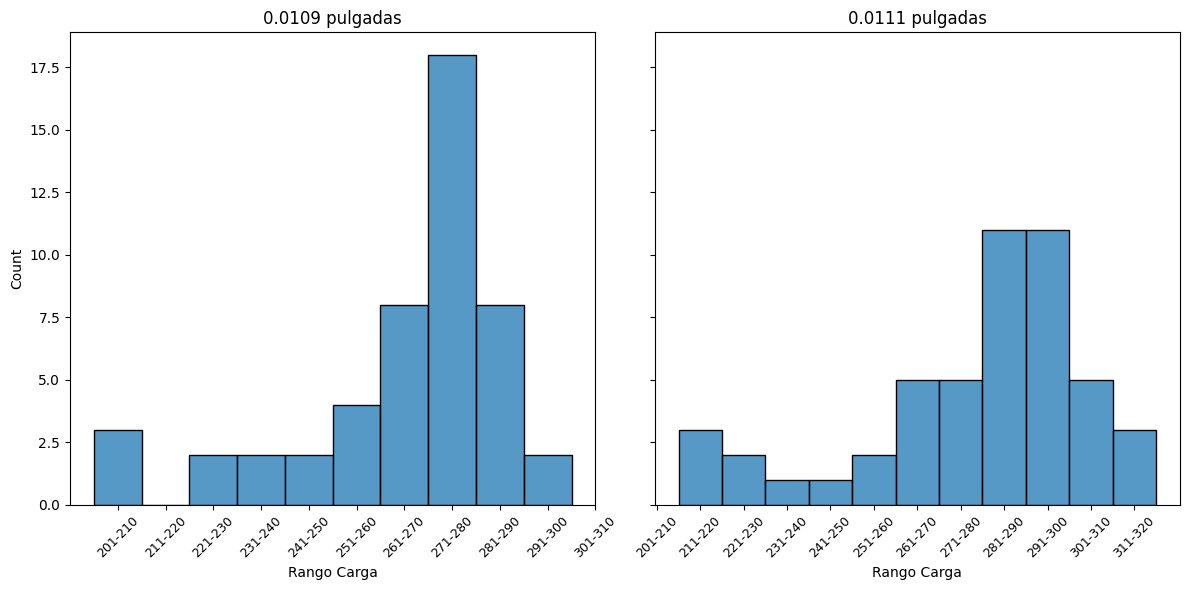

In [52]:
# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Primer histograma
sns.histplot(data=dfo109, x='Rango Carga', ax=axes[0])
axes[0].set_title('0.0109 pulgadas')


# Segundo histograma
sns.histplot(data=dfo111, x='Rango Carga', ax=axes[1])
axes[1].set_title('0.0111 pulgadas')

# Ajustar las etiquetas del eje x
for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45, fontsize=9)

# Ajustar el layout para que no haya superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### Histogramas de ambos grupos de meustras en conjunto
#### Concatenación de ambos dataframe en uno solo
Para poder ver ambos grupos en un solo histograma se concatenan ambos dataframes dfo109 y dfo111.

In [53]:
dfo= pd.concat([dfo109,dfo111])

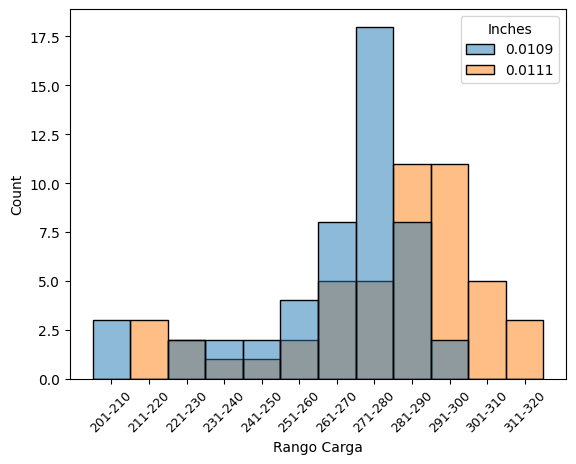

In [54]:
# Crear el grafico con las dos distribuciones en el mismo gráfico para compararlas
sns.histplot(dfo, x='Rango Carga', hue='Inches')
# Rotar y configurar el tamaño de los rótulos del eje x
plt.xticks(rotation=45, fontsize=9)

# Mostrar el gráfico
plt.show()

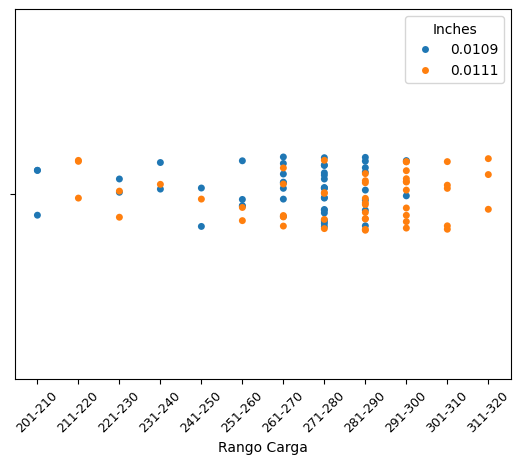

In [70]:
# Crear el grafico con las dos distribuciones en el mismo gráfico para compararlas
sns.stripplot(dfo, x='Rango Carga', hue='Inches')
# Rotar y configurar el tamaño de los rótulos del eje x
plt.xticks(rotation=45, fontsize=9)

# Mostrar el gráfico
plt.show()

### Histogramas de frecuencias relativas
Se observa la frecuencia relativa de una muestra con respecto a la otra dentro de un rango

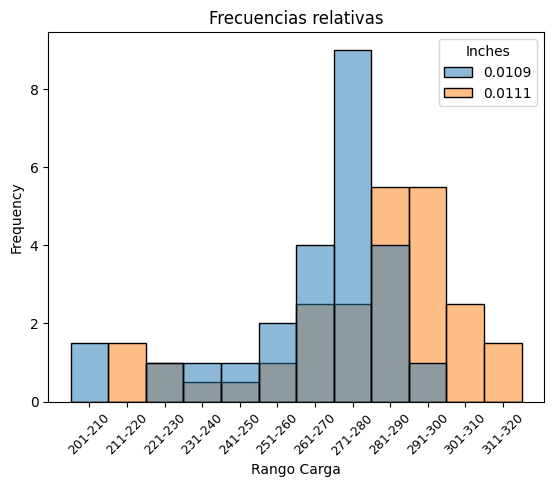

In [55]:
# Crear el grafico con las dos distribuciones en el mismo gráfico para compararlas
sns.histplot(dfo, x='Rango Carga', hue='Inches', stat='frequency')
# Rotar y configurar el tamaño de los rótulos del eje x
plt.xticks(rotation=45, fontsize=9)
plt.title('Frecuencias relativas')

# Mostrar el gráfico
plt.show()

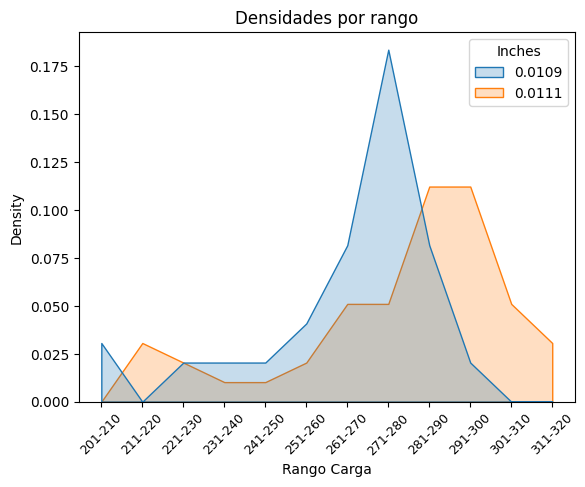

In [65]:
# Crear el grafico con las dos distribuciones en el mismo gráfico para compararlas
sns.histplot(dfo, x='Rango Carga', hue='Inches', element='poly', stat='density')
# Rotar y configurar el tamaño de los rótulos del eje x
plt.xticks(rotation=45, fontsize=9)
plt.title('Densidades por rango')

# Mostrar el gráfico
plt.show()

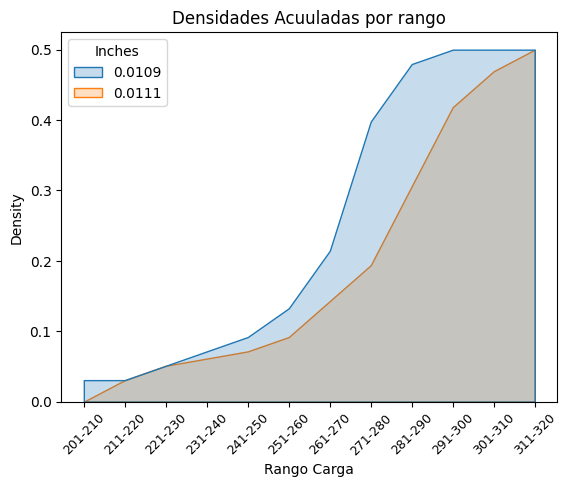

In [67]:
# Crear el grafico con las dos distribuciones en el mismo gráfico para compararlas
sns.histplot(dfo, x='Rango Carga', hue='Inches', element='poly', stat='density', cumulative=True)
# Rotar y configurar el tamaño de los rótulos del eje x
plt.xticks(rotation=45, fontsize=9)
plt.title('Densidades Acuuladas por rango')

# Mostrar el gráfico
plt.show()

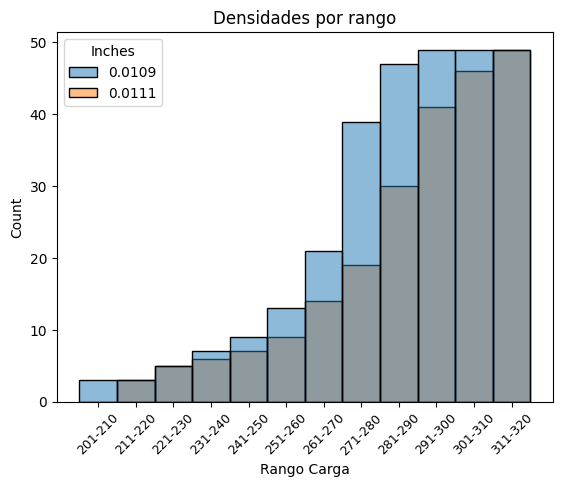

In [68]:
# Crear el grafico con las dos distribuciones en el mismo gráfico para compararlas
sns.histplot(dfo, x='Rango Carga', hue='Inches', cumulative=True)
# Rotar y configurar el tamaño de los rótulos del eje x
plt.xticks(rotation=45, fontsize=9)
plt.title('Densidades por rango')

# Mostrar el gráfico
plt.show()

## Resumen de Histogramas

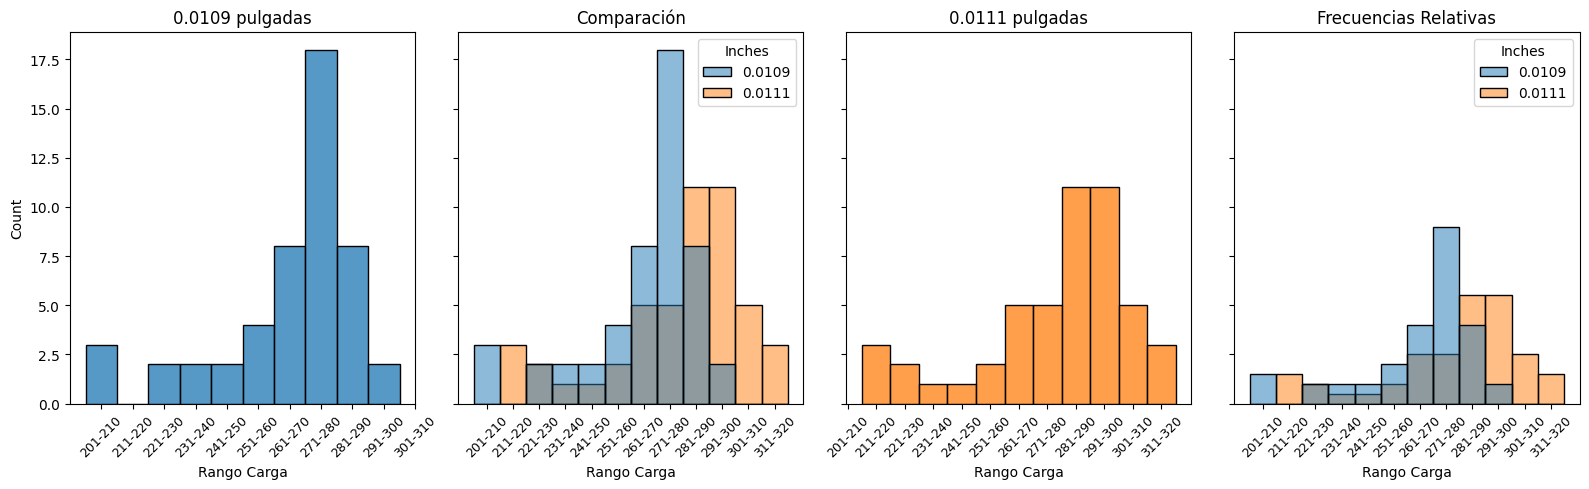

In [56]:
# Crear la figura y los subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=True)

# Primer histograma
sns.histplot(data=dfo109, x='Rango Carga', ax=axes[0])
axes[0].set_title('0.0109 pulgadas')


# Segundo histograma
axes[1].set_title('Comparación')
sns.histplot(data=dfo, x='Rango Carga', hue='Inches', ax=axes[1])

# Tercer histograma
axes[2].set_title('0.0111 pulgadas')
sns.histplot(data=dfo111, x='Rango Carga', ax=axes[2], color='C1')

# Cuarto histograma
axes[3].set_title('Frecuencias Relativas')
sns.histplot(dfo, x='Rango Carga', hue='Inches', stat='frequency')

# Ajustar las etiquetas del eje x
for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45, fontsize=9)

# Ajustar el layout para que no haya superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [57]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]